## MLP

In [1]:
import pandas as pd
%matplotlib inline
import sklearn as sk
import statsmodels as sm
from matplotlib import pyplot as plt
import seaborn as sbn
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_excel("diabetes_dataset.xlsx")

In [3]:
df.drop(columns= "Unnamed: 0", inplace= True)

In [4]:
df.columns.values

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income', 'targets'], dtype=object)

In [5]:
#Display column values to values have been processed
for name in df.columns.values:
    print(f"{name}:",df[name].unique())

HighBP: [1 0]
HighChol: [1 0]
CholCheck: [1 0]
BMI: [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker: [1 0]
Stroke: [0 1]
HeartDiseaseorAttack: [0 1]
PhysActivity: [0 1]
Fruits: [0 1]
Veggies: [1 0]
HvyAlcoholConsump: [0 1]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
GenHlth: [5 3 2 4 1]
MentHlth: [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth: [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk: [1 0]
Sex: [0 1]
Age: [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education: [4 6 3 5 2 1]
Income: [3 1 8 6 4 7 2 5]
targets: [0 1]


In [6]:
X = df.drop(columns='targets')

In [7]:
y = df['targets']

In [8]:
# Predict everything as not diabetes
1-sum(y)/len(y)

0.8606669820245979

In [9]:
scaled = ["BMI","MentHlth","PhysHlth"]
X.drop(columns = scaled, inplace = True)


In [10]:
to_scale = df[scaled]

In [11]:
df[scaled]

,BMI,MentHlth,PhysHlth
0,40,18,15
1,25,0,0
2,28,30,30
3,27,0,0
4,24,3,0
...,...,...,...
253675,45,0,5
253676,18,0,0
253677,28,0,0
253678,23,0,0


In [12]:
min_max_scale = MinMaxScaler()
scale_fit = min_max_scale.fit_transform(to_scale)


In [13]:
scale_frame = pd.DataFrame(scale_fit, columns = scaled)

In [14]:
scale_frame

,BMI,MentHlth,PhysHlth
0,0.325581,0.6,0.500000
1,0.151163,0.0,0.000000
2,0.186047,1.0,1.000000
3,0.174419,0.0,0.000000
4,0.139535,0.1,0.000000
...,...,...,...
253675,0.383721,0.0,0.166667
253676,0.069767,0.0,0.000000
253677,0.186047,0.0,0.000000
253678,0.127907,0.0,0.000000


In [15]:
X = pd.concat([X,scale_frame], axis = 1)

In [16]:
X.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,BMI,MentHlth,PhysHlth
0,1,1,1,1,0,0,0,0,1,0,...,0,5,1,0,9,4,3,0.325581,0.6,0.5
1,0,0,0,1,0,0,1,0,0,0,...,1,3,0,0,7,6,1,0.151163,0.0,0.0
2,1,1,1,0,0,0,0,1,0,0,...,1,5,1,0,9,4,8,0.186047,1.0,1.0
3,1,0,1,0,0,0,1,1,1,0,...,0,2,0,0,11,3,6,0.174419,0.0,0.0
4,1,1,1,0,0,0,1,1,1,0,...,0,2,0,0,11,5,4,0.139535,0.1,0.0


In [17]:
#One Hot Encode Ordinal Categorical Variables
hot = X[["GenHlth","Age","Education","Income"]]
encoder = OneHotEncoder(sparse_output= False)
encoded = encoder.fit_transform(hot)
feature_names = encoder.get_feature_names_out(input_features= hot.columns)
hot_df = pd.DataFrame(encoded, columns = feature_names)

In [18]:
#Merge X with Hot Encoded DF
X.drop(columns = ["GenHlth","Age","Education","Income"], inplace= True)
X = X.merge(hot_df, left_index= True, right_index= True)

In [19]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state= 1)

In [20]:
clf = MLPClassifier(random_state= 1, max_iter= 250)
clf_fit = clf.fit(X_train, y_train)
clf_predict = clf_fit.predict(X_test)
print(classification_report(y_test, clf_predict, target_names = ['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.88      0.97      0.92     43671
     class 1       0.51      0.19      0.27      7065

    accuracy                           0.86     50736
   macro avg       0.69      0.58      0.60     50736
weighted avg       0.83      0.86      0.83     50736



## MLP Displays

[Text(0.5, 1.0, 'MLP Classifer Test Data ROC Score')]

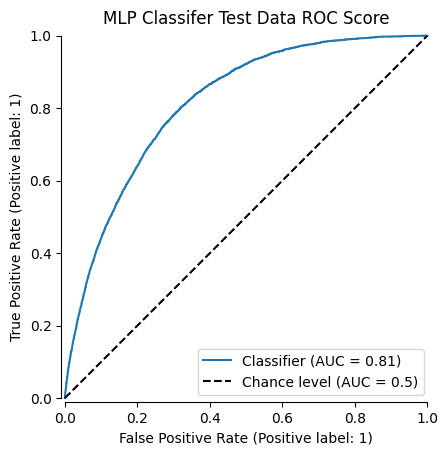

In [21]:
model_predict = clf_fit.predict_proba(X_test)[:,1]
roc_display_mlp = RocCurveDisplay.from_predictions(y_test, model_predict, plot_chance_level= True, despine = True)
roc_display_mlp.ax_.set(title = f"MLP Classifer Test Data ROC Score")

[Text(0.5, 1.0, 'MLP Classifer Test Data PR Curve Score')]

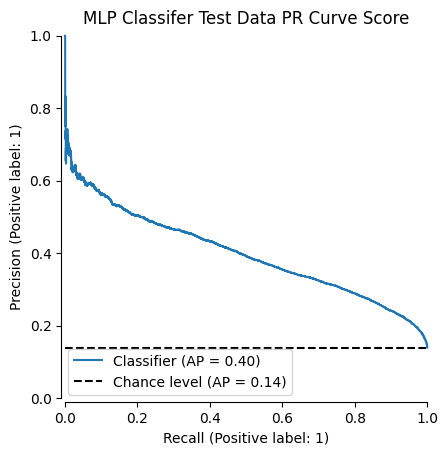

In [22]:
pr_display_mlp = PrecisionRecallDisplay.from_predictions(y_test, model_predict, plot_chance_level= True, despine = True)
pr_display_mlp.ax_.set(title = f"MLP Classifer Test Data PR Curve Score")

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve, CalibrationDisplay
import numpy as np

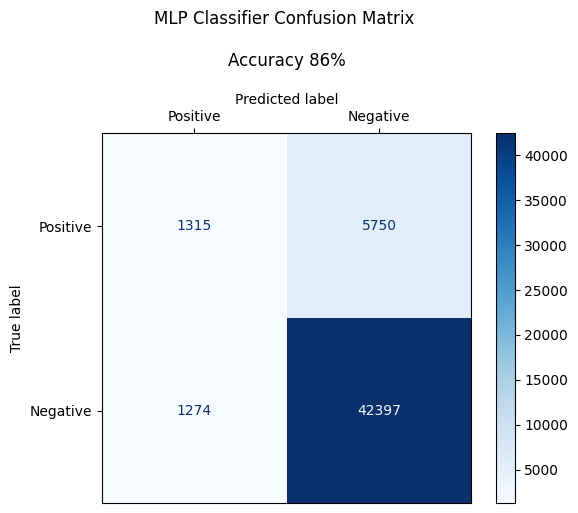

In [117]:
mlp_accuracy = accuracy_score(y_test, clf_predict)
cm = confusion_matrix(y_test, clf_predict)
cm = np.flip(cm, axis = 0)
cm = np.flip(cm, axis = 1)
cf_display_mlp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= ["Positive", "Negative"])
cf_display_mlp.plot(cmap = "Blues")
cf_display_mlp.ax_.set_title(f"MLP Classifier Confusion Matrix \n\nAccuracy {round(mlp_accuracy*100)}%", pad = 20)
cf_display_mlp.ax_.xaxis.set_label_position("top")
cf_display_mlp.ax_.xaxis.tick_top()
plt.show()


Text(0.5, 1.0, 'MLP Classifier Calibration Curve')

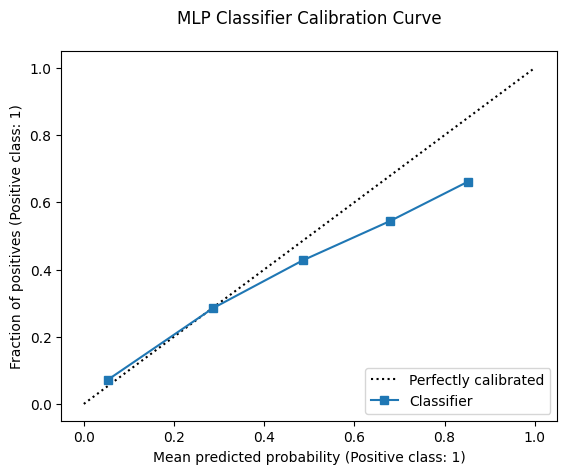

In [25]:
cal_display_mlp = CalibrationDisplay.from_predictions(y_test, model_predict)
cal_display_mlp.ax_.set_title("MLP Classifier Calibration Curve", pad = 20)



In [26]:
#MLP Classifier is not supported by SHAP

#import shap
#explainer = shap.DeepExplainer(clf_fit, X)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values,X)


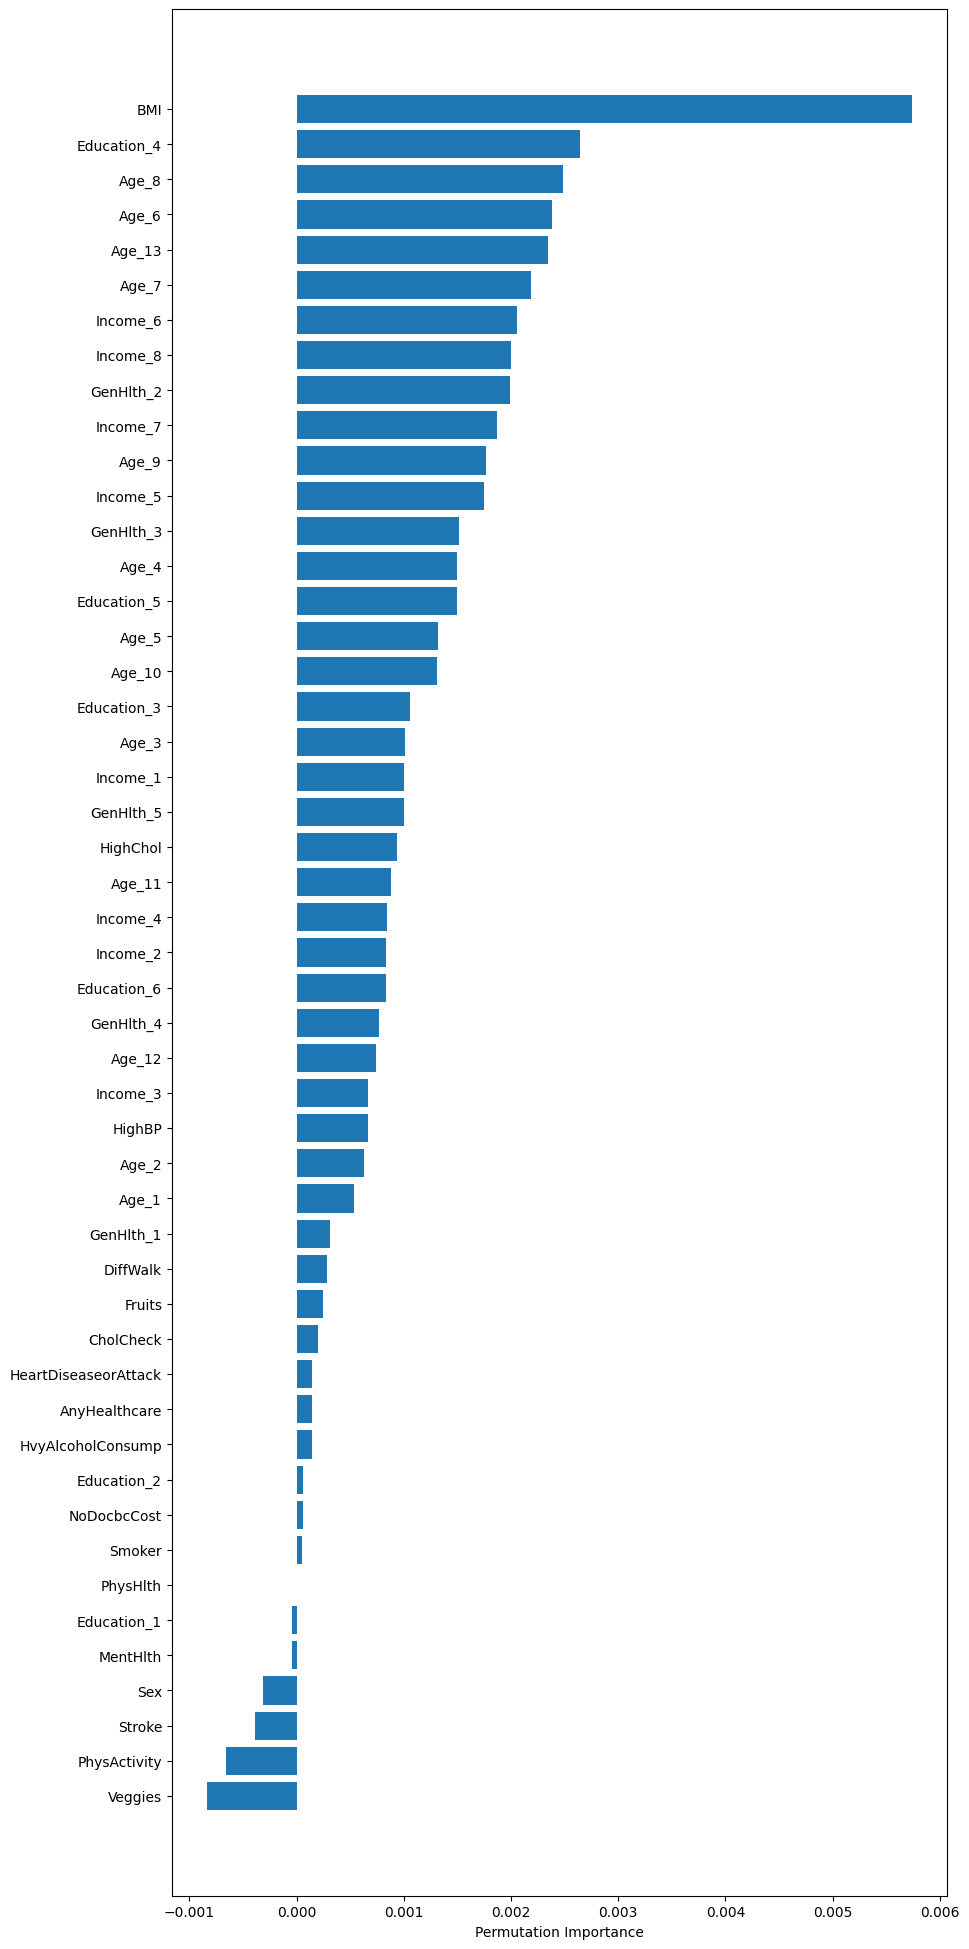

In [27]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained MLPClassifier and 'X_test', 'y_test' are your test data
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

importance = result.importances_mean
feature_names = X_test.columns #Or get the feature names from your dataframe.
sorted_idx = importance.argsort()



plt.figure(figsize=(10, len(feature_names) / 2))
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [28]:
importa = result.importances_mean
features = X_test.columns
perm_import = pd.DataFrame({'Importance': importa}, index = features, columns = ["Importance"])

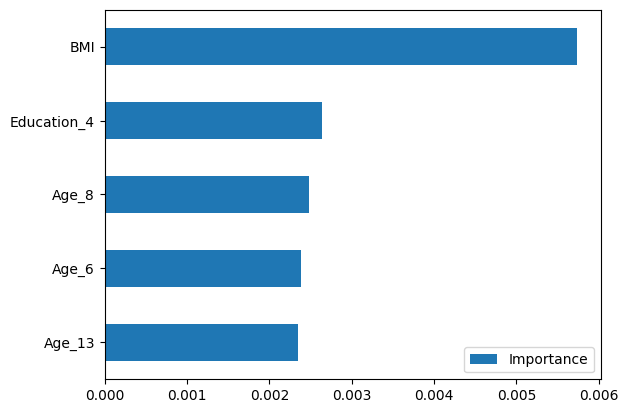

In [29]:
perm_import.sort_values(by = "Importance", ascending = False)[:5].plot(kind = "barh").invert_yaxis()

In [30]:
perm_import2 = perm_import

In [31]:
names = perm_import.index.values

In [32]:
age_filter = []
income_filter = []
education_filter = []
genhealth_fliter = []

for name in names:
    if name[:-2] == "Age":
        age_filter.append(name)
    elif name[:-3] == "Age":
        age_filter.append(name)
    else:
        continue

for name in names:
    if name[:-2] == "Income":
        income_filter.append(name)
    else:
        continue

for name in names:
    if name[:-2] == "Education":
        education_filter.append(name)
    else:
        continue

for name in names:
    if name[:-2] == "GenHlth":
        genhealth_fliter.append(name)
    else:
        continue

In [33]:
edu_import_comb = perm_import.T[education_filter].sum(1)
inc_import_comb = perm_import.T[income_filter].sum(1)
age_import_comb = perm_import.T[age_filter].sum(1)
gen_import_comb = perm_import.T[genhealth_fliter].sum(1)

In [34]:
perm_import2.drop(index= income_filter, inplace = True)
perm_import2.drop(index= age_filter, inplace = True)
perm_import2.drop(index= education_filter, inplace = True)
perm_import2.drop(index= genhealth_fliter, inplace = True)

In [35]:
comb_df = pd.DataFrame({"Importance": [edu_import_comb[0],inc_import_comb[0],age_import_comb[0],gen_import_comb[0]]}, index = ["Education", "Income", "Age", "GenHealth"])

C:\Users\terri\AppData\Local\Temp\ipykernel_32784\2354667153.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comb_df = pd.DataFrame({"Importance": [edu_import_comb[0],inc_import_comb[0],age_import_comb[0],gen_import_comb[0]]}, index = ["Education", "Income", "Age", "GenHealth"])


In [36]:
comb_df

,Importance
Education,0.006045
Income,0.011026
Age,0.019073
GenHealth,0.005584


In [37]:
perm_import2 = pd.concat([perm_import2,comb_df])

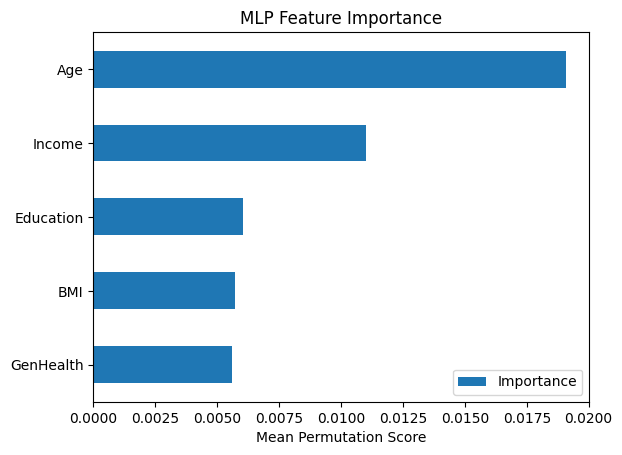

In [38]:
perm_import2.sort_values(by = "Importance", ascending = False)[:5].plot(kind = "barh", title = "MLP Feature Importance", xlabel = "Mean Permutation Score").invert_yaxis()

## Random Forest

In [128]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [129]:
df = pd.read_excel('diabetes_dataset.xlsx').drop(columns=["Unnamed: 0"])

KeyboardInterrupt: 

In [ ]:
# Drop low-importance features
columns_to_drop = [
    'CholCheck'
]
df = df.drop(columns=columns_to_drop)
print(df.columns.tolist())

['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'targets']


In [ ]:
# Separate features and target
X = df.drop('targets', axis=1)
y = df["targets"]

# Train/val/test split: 70/15/15
cv_X_train, cv_X_temp, cv_y_train, cv_y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
cv_X_val, cv_X_test, cv_y_val, cv_y_test = train_test_split(
    cv_X_temp, cv_y_temp, test_size=0.5, random_state=42, stratify=cv_y_temp
)

# Train Random Forest with class weighting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(cv_X_train, cv_y_train)

# Validation performance
val_preds = rf_model.predict(cv_X_val)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(cv_y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_val, val_preds))
print("Classification Report:\n", classification_report(cv_y_val, val_preds))

# Test performance
test_preds = rf_model.predict(cv_X_test)
print("Test Set Results:")
print("Accuracy:", accuracy_score(cv_y_test, test_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_test, test_preds))
print("Classification Report:\n", classification_report(cv_y_test, test_preds))

Validation Set Results:
Accuracy: 0.8587459266267213
Confusion Matrix:
 [[31775   975]
 [ 4400   902]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     32750
           1       0.48      0.17      0.25      5302

    accuracy                           0.86     38052
   macro avg       0.68      0.57      0.59     38052
weighted avg       0.82      0.86      0.83     38052

Test Set Results:
Accuracy: 0.8595343214548512
Confusion Matrix:
 [[31770   980]
 [ 4365   937]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     32750
           1       0.49      0.18      0.26      5302

    accuracy                           0.86     38052
   macro avg       0.68      0.57      0.59     38052
weighted avg       0.82      0.86      0.83     38052



In [ ]:
# added SMOTE, lower accuracey but better if your goal is to catch more diabetic patients
from imblearn.over_sampling import SMOTE
# Apply SMOTE to training set ONLY
smote = SMOTE(random_state=42)
cv_X_train_resampled, cv_y_train_resampled = smote.fit_resample(cv_X_train, cv_y_train)

# Train Random Forest on resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(cv_X_train_resampled, cv_y_train_resampled)

# Validation performance
val_preds = rf_model.predict(cv_X_val)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(cv_y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_val, val_preds))
print("Classification Report:\n", classification_report(cv_y_val, val_preds))

# Test performance
test_preds = rf_model.predict(cv_X_test)
print("Test Set Results:")
print("Accuracy:", accuracy_score(cv_y_test, test_preds))
print("Confusion Matrix:\n", confusion_matrix(cv_y_test, test_preds))
print("Classification Report:\n", classification_report(cv_y_test, test_preds))

Validation Set Results:
Accuracy: 0.7877378324398192
Confusion Matrix:
 [[27504  5246]
 [ 2831  2471]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     32750
           1       0.32      0.47      0.38      5302

    accuracy                           0.79     38052
   macro avg       0.61      0.65      0.63     38052
weighted avg       0.82      0.79      0.80     38052

Test Set Results:
Accuracy: 0.7863187217491854
Confusion Matrix:
 [[27459  5291]
 [ 2840  2462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     32750
           1       0.32      0.46      0.38      5302

    accuracy                           0.79     38052
   macro avg       0.61      0.65      0.62     38052
weighted avg       0.82      0.79      0.80     38052



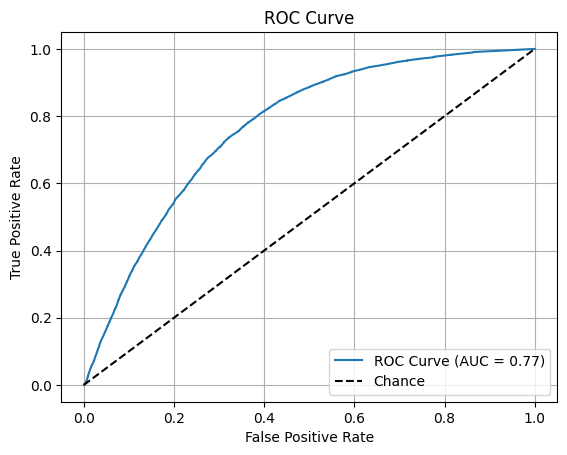

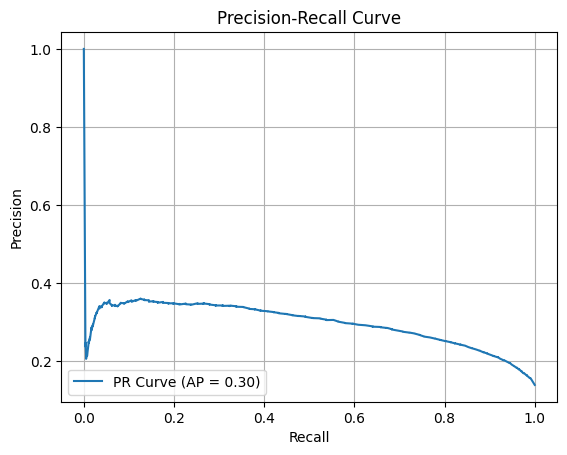

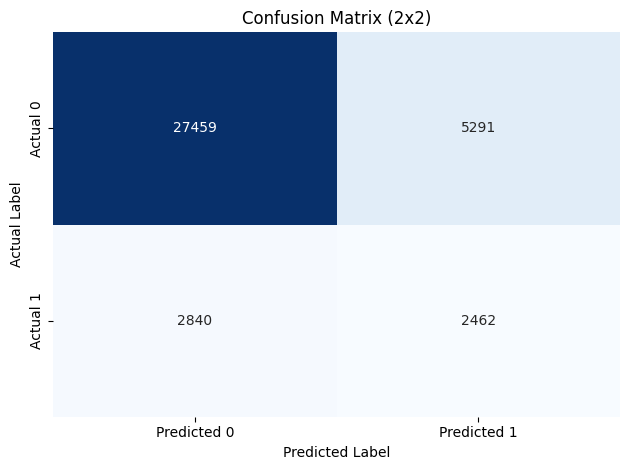

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix
)

# Get predicted probabilities for the positive class
y_scores = rf_model.predict_proba(cv_X_test)[:, 1]

# ----- ROC Curve -----
fpr, tpr, _ = roc_curve(cv_y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ----- PR Curve -----
precision, recall, _ = precision_recall_curve(cv_y_test, y_scores)
avg_precision = average_precision_score(cv_y_test, y_scores)

plt.figure()
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# ----- Confusion Matrix Heatmap ----- (need to be fixed)
cm = confusion_matrix(cv_y_test, test_preds)
cm_df = pd.DataFrame(
    cm,
    index=['Actual 0', 'Actual 1'],
    columns=['Predicted 0', 'Predicted 1']
)

ax = sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix (2x2)')
plt.tight_layout()
plt.show()


## Random Forest Displays

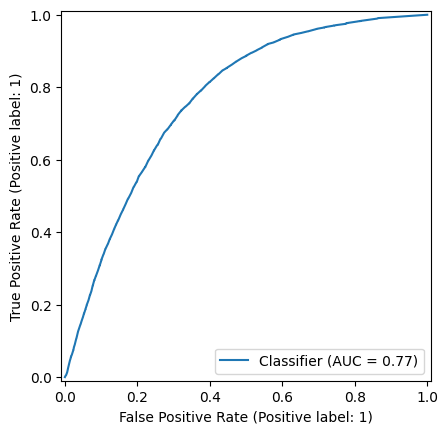

In [48]:
roc_display_rf = RocCurveDisplay.from_predictions(cv_y_test, y_scores)


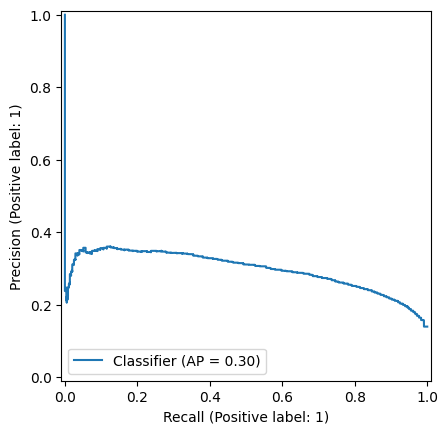

In [49]:
pr_display_rf = PrecisionRecallDisplay.from_predictions(cv_y_test, y_scores)

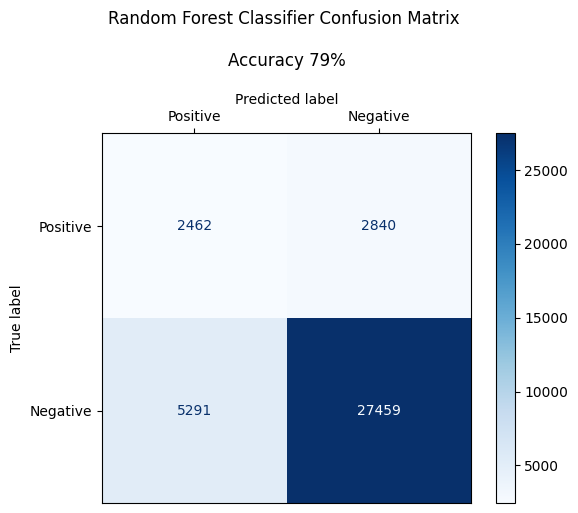

In [105]:
rf_accuracy = accuracy_score(cv_y_test, test_preds)
cm = np.flip(cm, axis = 0)
cm = np.flip(cm, axis = 1)
cf_display_rf = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= ["Positive", "Negative"])
cf_display_rf.plot(cmap = "Blues")
cf_display_rf.ax_.set_title(f"Random Forest Classifier Confusion Matrix \n\nAccuracy {round(rf_accuracy*100)}%", pad = 20)
cf_display_rf.ax_.xaxis.set_label_position("top")
cf_display_rf.ax_.xaxis.tick_top()

Text(0.5, 1.0, 'Random Forest Classifier Calibration Curve')

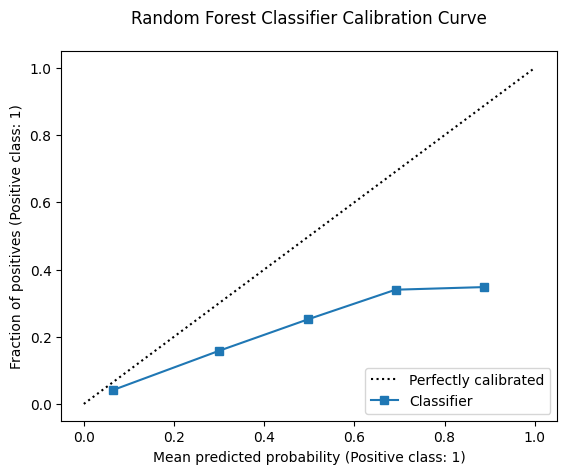

In [57]:
cal_display_rf = CalibrationDisplay.from_predictions(cv_y_test, y_scores)
cal_display_rf.ax_.set_title("Random Forest Classifier Calibration Curve", pad = 20)

## KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
# Define feature matrix X and target vector y
X = df.drop(columns=['targets'])  # Replace 'targets' with your actual target column if different
y = df['targets']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize KNN (start with k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate performance
knn_accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     43739
           1       0.39      0.21      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.59     50736
weighted avg       0.81      0.85      0.83     50736

Confusion Matrix:
 [[41518  2221]
 [ 5551  1446]]


In [ ]:
# Try different k values and plot accuracy (This will take 20 minutes to run)
#from sklearn.model_selection import cross_val_score

k_range = range(1, 31)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())

# Plotting k vs accuracy
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Best k value
best_k = k_range[np.argmax(accuracies)]
print(f"Best k based on cross-validation: {best_k:.0f} with accuracy = {max(accuracies):.4f}")

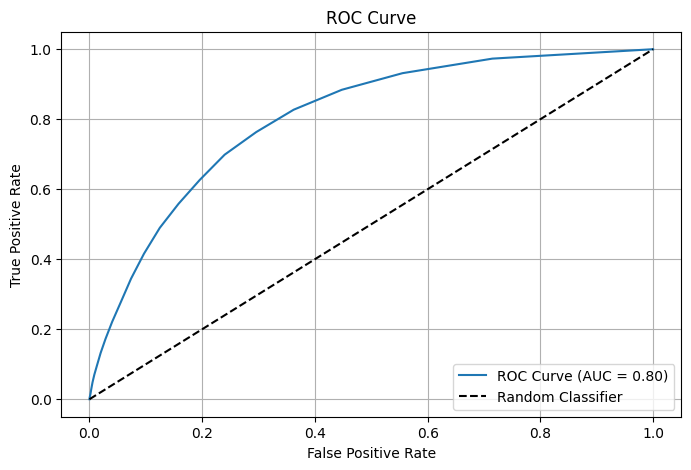

In [131]:
# Refit the KNN model with the best k value
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

# Get probability estimates for the positive class
y_proba = knn.predict_proba(X_test)[:, 1]
y_pred = knn.predict(X_test)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


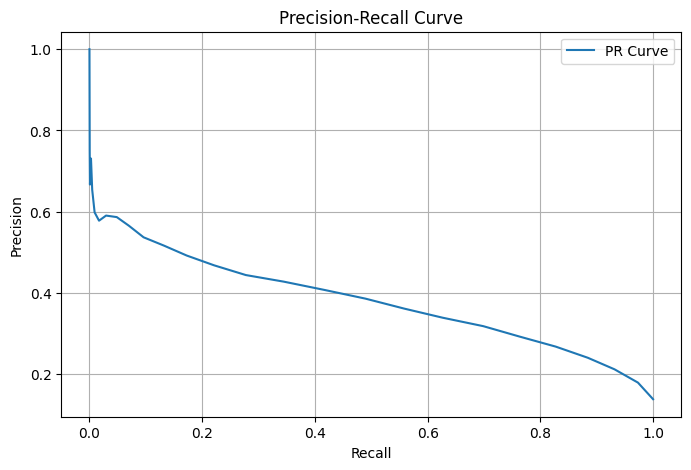

In [132]:
# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

## KNN Displays

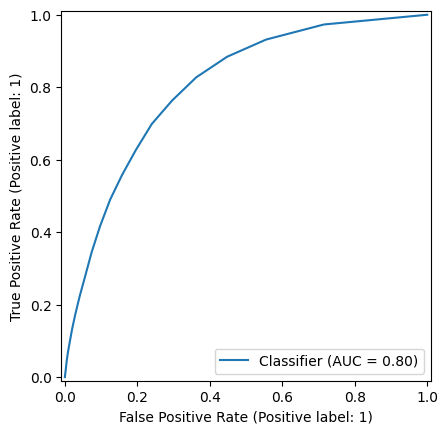

In [133]:
roc_display_knn = RocCurveDisplay.from_predictions(y_test, y_proba)

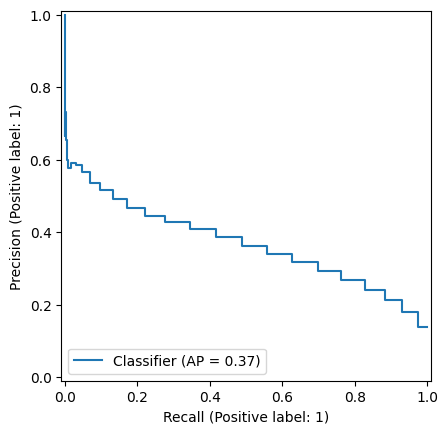

In [134]:
pr_display_knn = PrecisionRecallDisplay.from_predictions(y_test, y_proba)

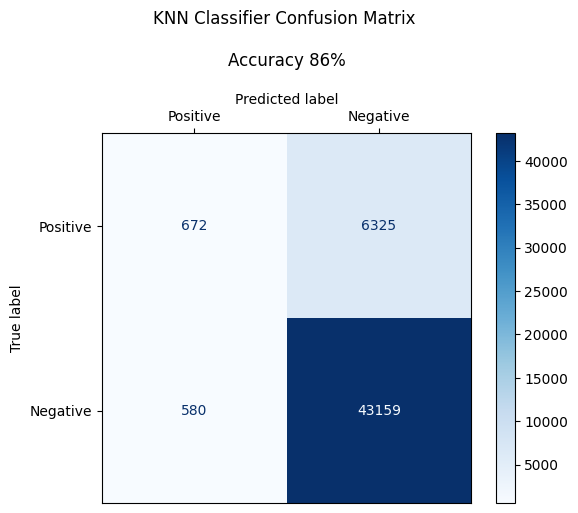

In [135]:
knn_accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm = np.flip(cm, axis = 0)
cm = np.flip(cm, axis = 1)
cf_display_knn = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= ["Positive", "Negative"])
cf_display_knn.plot(cmap = "Blues")
cf_display_knn.ax_.set_title(f"KNN Classifier Confusion Matrix \n\nAccuracy {round(knn_accuracy*100)}%", pad = 20)
cf_display_knn.ax_.xaxis.set_label_position("top")
cf_display_knn.ax_.xaxis.tick_top()

Text(0.5, 1.0, 'KNN Classifier Calibration Curve')

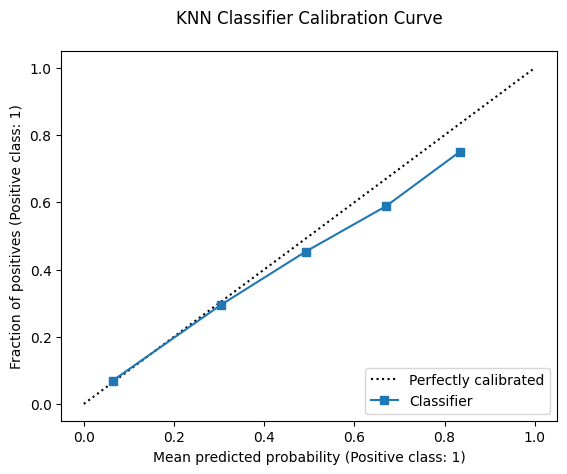

In [137]:
cal_display_knn = CalibrationDisplay.from_predictions(y_test, y_proba)
cal_display_knn.ax_.set_title("KNN Classifier Calibration Curve", pad = 20)

## Logistic Regression

Test Accuracy: 0.867
Test Precision: 0.559


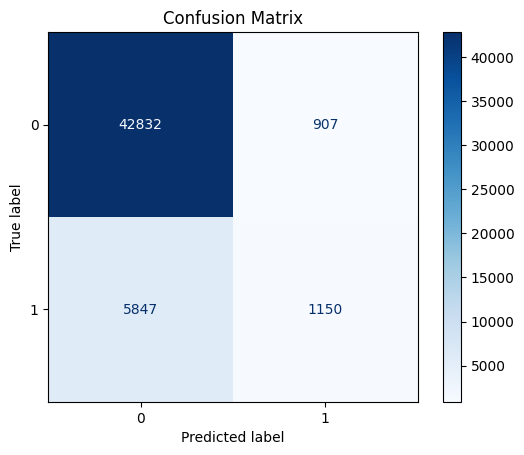

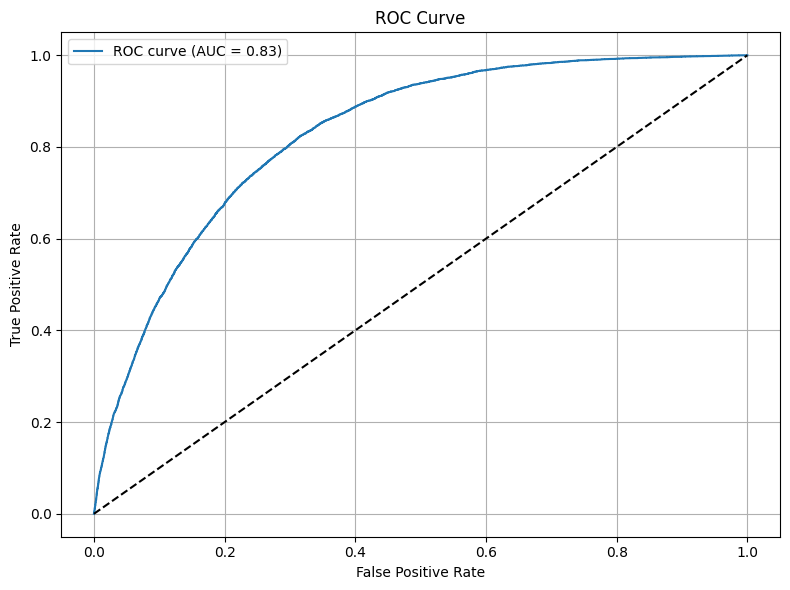

In [155]:
#Approach A
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("diabetes_dataset.xlsx")

# Drop index column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Separate features and target
X = df.drop(columns=['targets'])
y = df['targets']

# Categorical and numeric feature handling
categorical_cols = ['Education', 'Income', 'Age']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# Logistic Regression with L2
logreg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Build pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.3f}")
print(f"Test Precision: {precision:.3f}")



# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Logistic Regression Displays

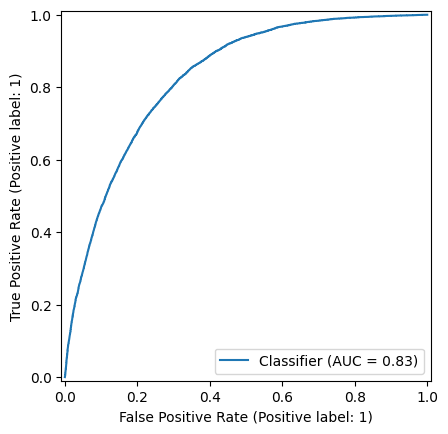

In [156]:
roc_display_log = RocCurveDisplay.from_predictions(y_test, y_prob)

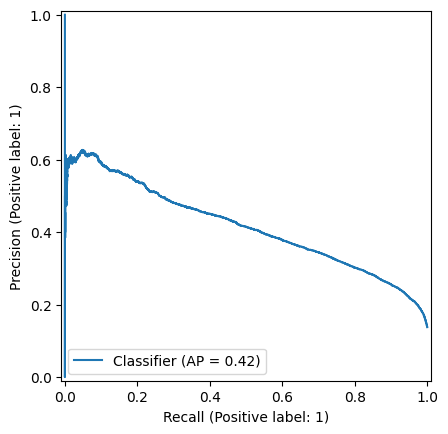

In [157]:
pr_display_log = PrecisionRecallDisplay.from_predictions(y_test, y_prob)

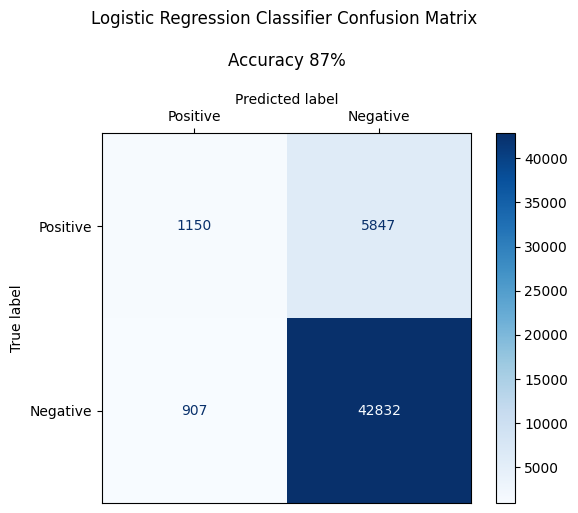

In [158]:
log_accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm = np.flip(cm, axis = 0)
cm = np.flip(cm, axis = 1)
cf_display_log = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= ["Positive", "Negative"])
cf_display_log.plot(cmap = "Blues")
cf_display_log.ax_.set_title(f"Logistic Regression Classifier Confusion Matrix \n\nAccuracy {round(log_accuracy*100)}%", pad = 20)
cf_display_log.ax_.xaxis.set_label_position("top")
cf_display_log.ax_.xaxis.tick_top()

Text(0.5, 1.0, 'Logistic Regression Classifier Calibration Curve')

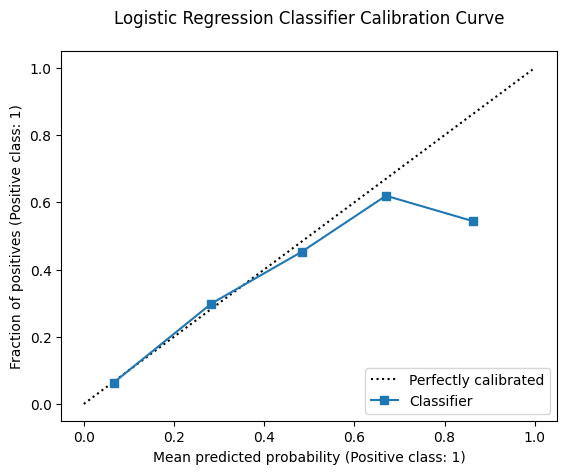

In [159]:
cal_display_log = CalibrationDisplay.from_predictions(y_test, y_prob)
cal_display_log.ax_.set_title("Logistic Regression Classifier Calibration Curve", pad = 20)

## Comparison Graphs

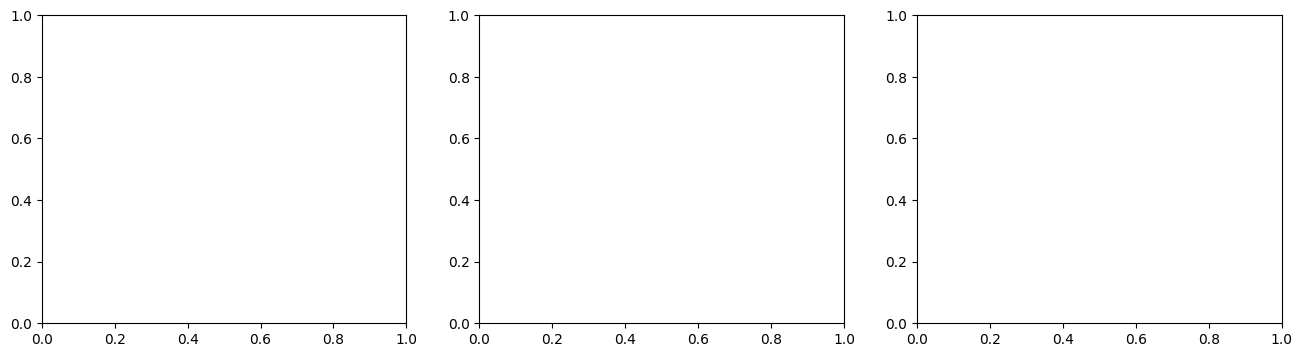

In [198]:
fig2, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols= 3, sharex = False, sharey = False, figsize = (16,4))

In [199]:
#ROC Displays
roc_display_log.plot(ax = ax1, name = "Logistic Regression (A)")
roc_display_mlp.plot(ax = ax1, name = "MLP")
roc_display_knn.plot(ax = ax1, name = "KNN")
roc_display_rf.plot(ax = ax1, name = "Random Forest", plot_chance_level= True, despine = True)



#PR Curves
pr_display_log.plot(ax = ax2, name = "Logistic Regression (A)")
pr_display_mlp.plot(ax = ax2, name = "MLP")
pr_display_knn.plot(ax = ax2, name = "KNN")
pr_display_rf.plot(ax = ax2, name = "Random Forest", plot_chance_level= True, despine = True)



#Calibration Curves
cal_display_log.plot(ax = ax3, name = 'Logistic Regression (A)')
cal_display_mlp.plot(ax = ax3, name = "MLP")
cal_display_knn.plot(ax = ax3, name = 'KNN')
cal_display_rf.plot(ax = ax3, name = 'Random Forest')



In [200]:
ax1.set_title("Comparison of Classifer ROC-AUC", pad = 10)
ax1.legend(loc ="best")
ax2.set_title("Comparison of Classifer PR Curve", pad = 10)
ax2.legend(loc ="best")
ax3.set_title("Comparison of Classifer Calibration Curves", pad = 10)
ax3.legend(loc ="best")

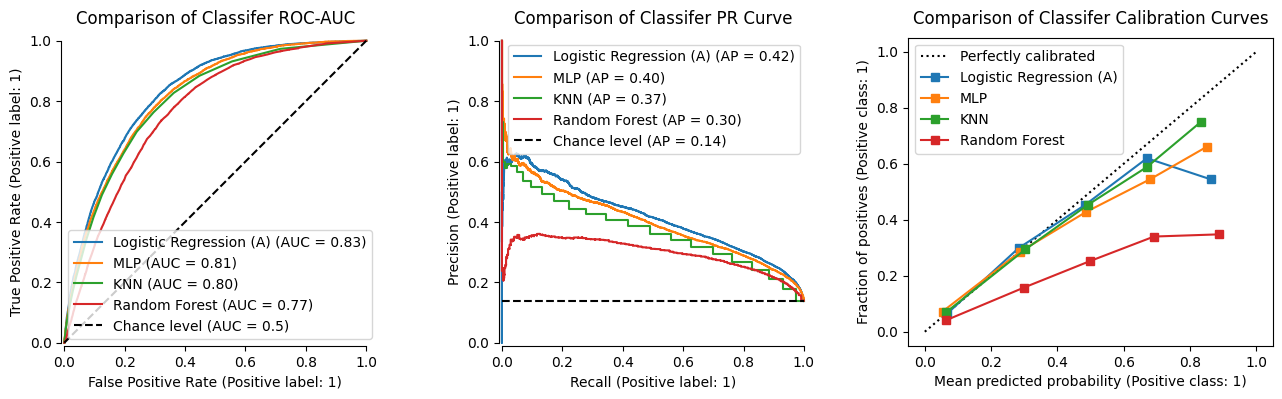

In [201]:
fig2

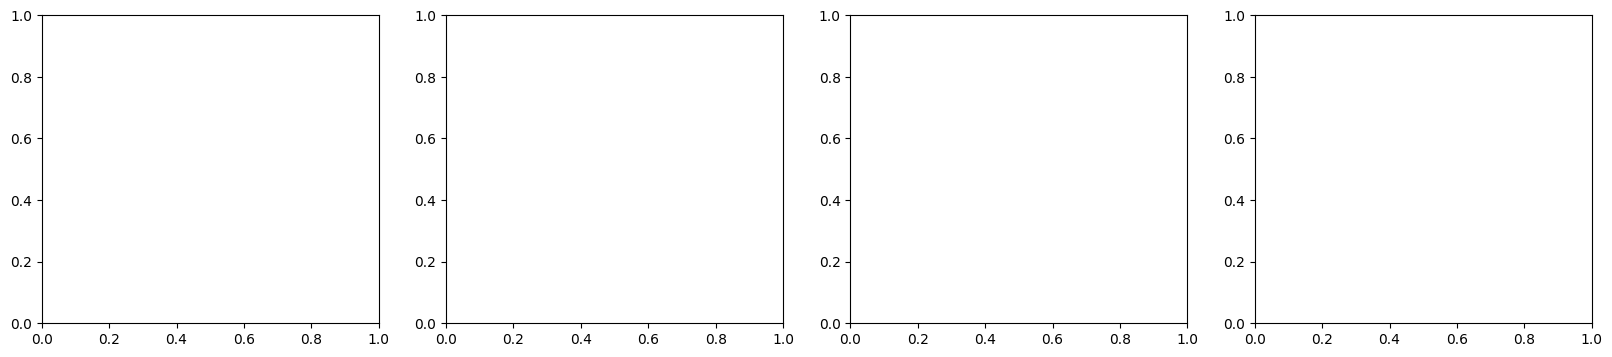

In [203]:
fig3, (ax4, ax5, ax6, ax7) = plt.subplots(nrows = 1, ncols= 4, sharex = False, sharey = False, figsize = (20,4))

In [204]:
cf_display_mlp.plot(ax = ax5, cmap = "Blues")
cf_display_rf.plot(ax = ax7, cmap = "Blues")
cf_display_knn.plot(ax = ax6, cmap = "Blues")
cf_display_log.plot(ax = ax4, cmap = "Blues")

In [205]:
ax5.set_title(label = f"MLP Classifier Confusion Matrix \n\nAccuracy {round(mlp_accuracy*100)}%", pad = 20)
ax7.set_title(label = f"Random Forest Classifier Confusion Matrix \n\nAccuracy {round(rf_accuracy*100)}%", pad = 20)
ax6.set_title(label = f"KNN Classifier Confusion Matrix \n\nAccuracy {round(knn_accuracy*100)}%", pad = 20)
ax4.set_title(label = f"Logistic Regression (A) Classifier Confusion Matrix \n\nAccuracy {round(log_accuracy*100)}%", pad = 20)

Text(0.5, 1.0, 'Logistic Regression (A) Classifier Confusion Matrix \n\nAccuracy 87%')

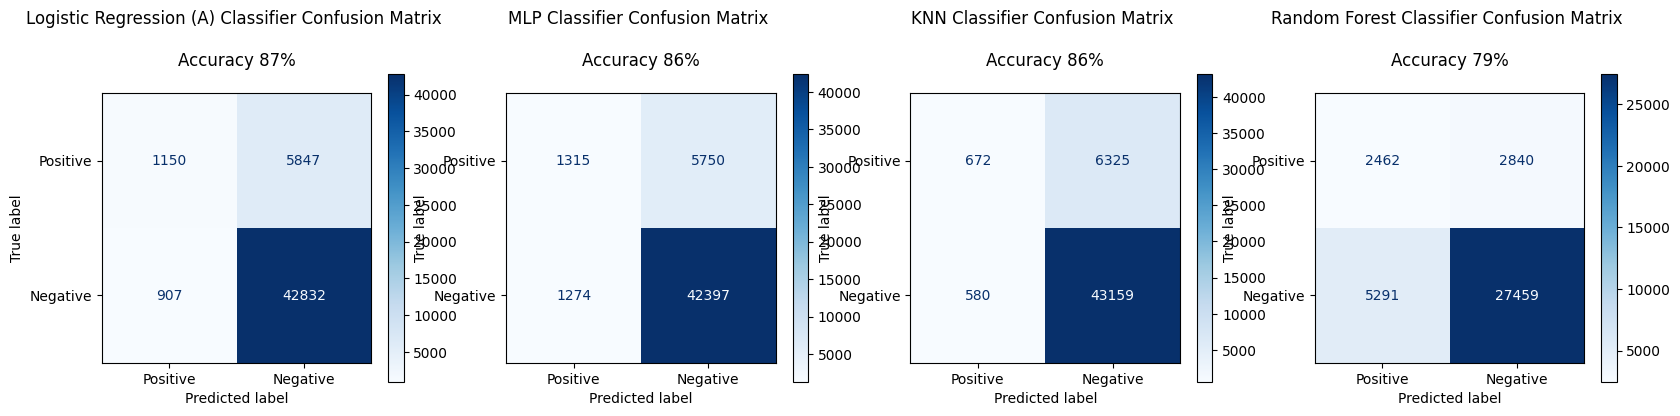

In [206]:
fig3